In [22]:
import matplotlib.pyplot as plt
import matplotlib
from deepface import DeepFace


In [23]:
from numpy import savetxt
from numpy import loadtxt

In [24]:
md = "GBU-Dataset/"

In [25]:
import os
# create arrays to have the images inside them
bad_q = os.listdir("GBU-Dataset/Bad_Query_Normailized_128x128_gbuReduced")
bad_t = os.listdir("GBU-Dataset/Bad_Target_Normailized_128x128_gbuReduced")
good_q = os.listdir("GBU-Dataset/Good_Query_Normailized_128x128_gbuReduced")
good_t = os.listdir("GBU-Dataset/Good_Target_Normailized_128x128_gbuReduced")
ugly_q = os.listdir("GBU-Dataset/Ugly_Query_Normailized_128x128_gbuReduced")
ugly_t = os.listdir("GBU-Dataset/Ugly_Target_Normailized_128x128_gbuReduced")

#['Bad_Query_Normailized_128x128_gbuReduced', 'Bad_Target_Normailized_128x128_gbuReduced', 'Good_Target_Normailized_128x128_gbuReduced', 'Ugly_Query_Normailized_128x128_gbuReduced', 'Good_Query_Normailized_128x128_gbuReduced', 'Ugly_Target_Normailized_128x128_gbuReduced']

#print(os.listdir("drive/MyDrive/PSU work/GBU-Dataset/Bad_Query_Normailized_128x128_gbuReduced"))


In [26]:
# =rcFace + OpenFace + SFace (all )
#print(len(emb))
import numpy as np
from numpy import savetxt


for i in good_q:
    emb = DeepFace.represent(img_path = md+"Good_Query_Normailized_128x128_gbuReduced/"+i, model_name = 'OpenFace',enforce_detection=False)
    npar = np.array(emb)
    savetxt("GBU-Dataset/OpenFace/Good_Query/"+i+".csv", npar, delimiter=',')
    
for i in good_t:
    emb = DeepFace.represent(img_path = md+"Good_Target_Normailized_128x128_gbuReduced/"+i, model_name = 'OpenFace',enforce_detection=False)
    npar = np.array(emb)
    savetxt("GBU-Dataset/OpenFace/Good_Target/"+i+".csv", npar, delimiter=',')
    

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 23ms/step


In [27]:
#IMP
good_qe = os.listdir("GBU-Dataset/OpenFace/Good_Query/")
good_te = os.listdir("GBU-Dataset/OpenFace/Good_Target/")
#data = loadtxt("GBU-Dataset/Bad_Query/"+i, delimiter=',')
diff = []
don = []

for i in good_qe:
    idq = i.split("d")[0]
    if idq not in don:
        embq = loadtxt("GBU-Dataset/OpenFace/Good_Query/"+i, delimiter=',')
        for j in good_te:
            idt = j.split("d")[0]
            embt = loadtxt("GBU-Dataset/OpenFace/Good_Target/"+j, delimiter=',')
            if idq != idt:
                diff.append(DeepFace.dst.findCosineDistance(embq,embt))
    don.append(idq)
    

In [28]:
#GIN
good_qe = os.listdir("GBU-Dataset/OpenFace/Good_Query/")
good_te = os.listdir("GBU-Dataset/OpenFace/Good_Target/")
#data = loadtxt("GBU-Dataset/Bad_Query/"+i, delimiter=',')
sm = []
don = []

for i in good_qe:
    idq = i.split("d")[0]
    if idq not in don:
        embq = loadtxt("GBU-Dataset/OpenFace/Good_Query/"+i, delimiter=',')
        for j in good_te:
            idt = j.split("d")[0]
            embt = loadtxt("GBU-Dataset/OpenFace/Good_Target/"+j, delimiter=',')
            if idq == idt:
                sm.append(DeepFace.dst.findCosineDistance(embq,embt))
    don.append(idq)
    

0.35140189992327575
0.10564652839835965
473060
1085


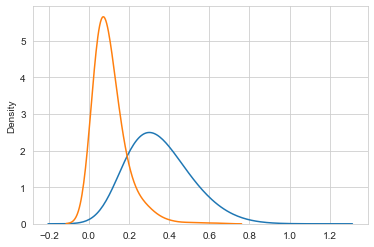

In [32]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(diff, bw=0.5)
sns.kdeplot(sm, bw=0.5)
# print(len(diff))
print(sum(diff)/len(diff))
print(sum(sm)/len(sm))
print(len(diff))
print(len(sm))

In [30]:
# saving the distinces 
ar1 = np.array(diff)
savetxt("GBU-Dataset/dis/"+"imp_good+OpenFace"+".csv", ar1, delimiter=',')
ar2 = np.array(sm)
savetxt("GBU-Dataset/dis/"+"gin_good+OpenFace"+".csv", ar2, delimiter=',')